# Data Analytics Assignment 3

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, make_scorer, classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Data Exploration

**Read the weather Data**

In [5]:
current_data = pd.read_csv("Assignment3-WeatherData.csv")
unknown_data = pd.read_csv("Assignment3-UnknownData.csv")

**Display the first 10 samples from the Data**

In [7]:
unknown_data.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No
1,Row1,Albury,19.7,27.2,0.0,NaN,NaN,WNW,46.0,NW,...,30.0,49.0,22.0,1004.8,1004.2,NaN,NaN,21.6,26.1,No
2,Row2,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,...,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No
3,Row3,Albury,14.9,27.3,0.0,NaN,NaN,SSE,41.0,SSE,...,13.0,50.0,30.0,1011.6,1008.5,NaN,1.0,17.4,25.8,No
4,Row4,Albury,13.2,31.9,0.0,NaN,NaN,NNW,35.0,S,...,9.0,53.0,25.0,1014.1,1011.6,NaN,NaN,18.0,29.8,No
5,Row5,Albury,9.3,28.0,0.0,NaN,NaN,NW,52.0,SSE,...,11.0,76.0,19.0,1017.4,1013.9,NaN,NaN,14.7,27.2,No
6,Row6,Albury,13.8,33.6,0.0,NaN,NaN,NNW,28.0,NaN,...,11.0,47.0,17.0,1017.0,1013.1,NaN,2.0,18.8,33.5,No
7,Row7,Albury,12.3,29.9,0.0,NaN,NaN,WSW,26.0,S,...,13.0,61.0,25.0,1023.2,1019.5,NaN,NaN,17.1,28.6,No
8,Row8,Albury,5.4,19.5,0.0,NaN,NaN,SE,17.0,NaN,...,7.0,69.0,40.0,1025.1,1022.3,NaN,NaN,11.7,19.1,No
9,Row9,Albury,0.5,15.3,0.0,NaN,NaN,ESE,13.0,NE,...,6.0,93.0,56.0,1030.8,1027.1,NaN,NaN,5.4,15.1,No


In [8]:
print(current_data.isna().sum())
print(current_data.shape)
#print(unknown_data.isna().sum())
#current_data = current_data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])
unknown_data = unknown_data.drop(columns=['row ID'])

Location             0
MinTemp            240
MaxTemp            114
Rainfall           532
Evaporation      21972
Sunshine         24479
WindGustDir       3321
WindGustSpeed     3298
WindDir9am        3635
WindDir3pm        1404
WindSpeed9am       504
WindSpeed3pm      1000
Humidity9am        668
Humidity3pm       1359
Pressure9am       5061
Pressure3pm       5063
Cloud9am         19404
Cloud3pm         20648
Temp9am            348
Temp3pm           1038
RainToday          532
RainTomorrow         0
dtype: int64
(51199, 22)


In [10]:
current_data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,50959.000000,51085.000000,50667.000000,29227.000000,26720.000000,47901.000000,50695.000000,50199.000000,50531.000000,49840.000000,46138.000000,46136.000000,31795.000000,30551.000000,50851.000000,50161.000000,51199.000000
mean,12.191242,23.227157,2.322616,5.454296,7.627231,39.991775,14.004616,18.629415,68.835824,51.493319,1017.653617,1015.250889,4.440950,4.506825,16.990897,21.691701,0.224047
std,6.417429,7.148487,8.135593,4.083712,3.779703,13.532957,8.881499,8.774264,19.024289,20.832065,7.128786,7.065222,2.882738,2.717021,6.508125,6.966723,0.416957
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-4.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.250000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.300000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.500000,0.000000
max,33.900000,47.300000,268.600000,72.200000,14.500000,130.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,46.700000,1.000000


## Data Preprocessing

### Dealing with Missing Values

In [17]:
for column in current_data.select_dtypes(include=["float64"]).columns:
    current_data[column] = current_data[column].fillna(current_data[column].median())
for column in unknown_data.select_dtypes(include=["float64"]).columns:
    unknown_data[column] = unknown_data[column].fillna(unknown_data[column].median())
for column in current_data.select_dtypes(include=["object"]).columns:
    current_data[column] = current_data[column].fillna(current_data[column].mode()[0])
for column in unknown_data.select_dtypes(include=["object"]).columns:
    unknown_data[column] = unknown_data[column].fillna(unknown_data[column].mode()[0])

### Label Encoding String Attributes

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in current_data.select_dtypes(include=['object']).columns:
    current_data[col] = le.fit_transform(current_data[col])
for col in unknown_data.select_dtypes(include=['object']).columns:
    unknown_data[col] = le.fit_transform(unknown_data[col])


### Feature Selection

In [23]:
# Step 5: Split X and y
X = current_data.drop(columns=['RainTomorrow'])
y = current_data['RainTomorrow']

# Step 6: Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=20)
X_selected = selector.fit_transform(X, y)
X_unknown_selected = selector.transform(unknown_data)


### Handling Outliers

In [26]:
X_selected = np.where(X_selected <= 0, 1e-6, X_selected)  # Replace <= 0 with a small constant
X_unknown_selected = np.where(X_unknown_selected <= 0, 1e-6, X_unknown_selected)

X_selected_log = np.log1p(X_selected)  # Apply log(1+x)
X_unknown_log = np.log1p(X_unknown_selected)

### Normalizing Data using StandardScaler

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_log)
X_unknown_scaled = scaler.transform(X_unknown_log)

**Feature Selection using KBest**

## Models

### Setup for Training, Testing, and Cross Validation Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### SMOTE

In [37]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Decision Tree Model 

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=20,
                       random_state=42)
Decision Tree - AUC: 0.8221978906748049, Accuracy: 0.7998046875, F1 Score: 0.5932539682539683, Recall Score:0.6432874354561101, Precision Score: 0.5504418262150221
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7916
           1       0.55      0.64      0.59      2324

    accuracy                           0.80     10240
   macro avg       0.72      0.74      0.73     10240
weighted avg       0.81      0.80      0.81     10240



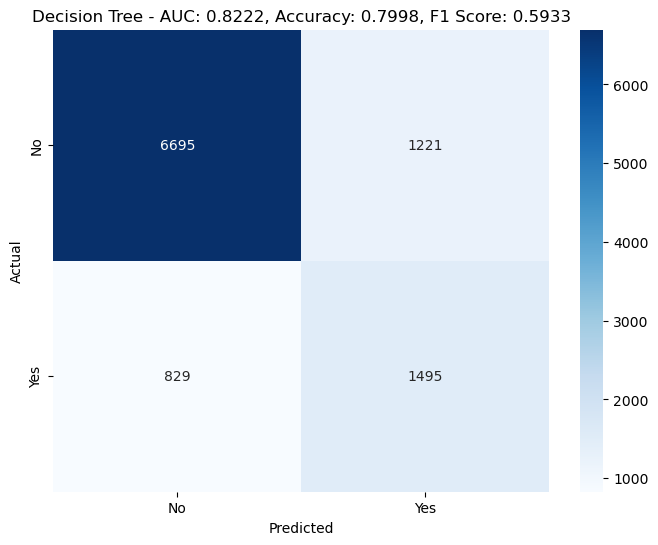

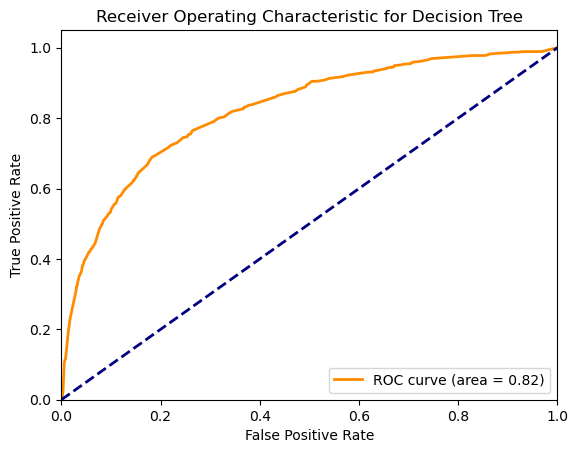

In [76]:
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],  # Depth of the tree
    'min_samples_split': [5, 10, 15, 20],  # Minimum samples needed to split a node
    'min_samples_leaf': [2, 4, 6, 8],  # Minimum samples needed at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Tune Decision Tree with RandomizedSearchCV
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)
grid_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid_dt, 
                                    scoring=auc_scorer, n_iter=10, cv=5, n_jobs=-1, random_state=42)
grid_search_dt.fit(X_train_smote, y_train_smote)

best_dt = grid_search_dt.best_estimator_
print(best_dt)

# Evaluate Decision Tree on test set
y_test_pred_dt = best_dt.predict(X_test)
y_test_prob_dt = best_dt.predict_proba(X_test)[:, 1]

auc_dt = roc_auc_score(y_test, y_test_prob_dt)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt)
classification_dt = classification_report(y_test, y_test_pred_dt)

print(f"Decision Tree - AUC: {auc_dt}, Accuracy: {accuracy_dt}, F1 Score: {f1_dt}, Recall Score:{recall_dt}, Precision Score: {precision_dt}")
print(classification_dt)

# Confusion Matrix for Decision Tree
confusion_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f"Decision Tree - AUC: {auc_dt:.4f}, Accuracy: {accuracy_dt:.4f}, F1 Score: {f1_dt:.4f}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Plot ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_dt, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()


# Step 11: Make predictions on unknown data
y_unknown_pred = best_dt.predict(X_unknown_scaled)

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'row ID': [f"Row{num}" for num in unknown_data.index],
    'Predict-RainTomorrow': y_unknown_pred 
})

predictions_df.to_csv('predictions_output.csv', index=False)

### K Nearest Neighbour Model

KNeighborsClassifier(metric='manhattan', weights='distance')
KNN - AUC: 0.805493014431218, Accuracy: 0.76044921875, F1 Score: 0.5756789482788445, Recall Score: 0.7160068846815835, Precision Score: 0.48134220422331503
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      7916
           1       0.48      0.72      0.58      2324

    accuracy                           0.76     10240
   macro avg       0.69      0.74      0.70     10240
weighted avg       0.81      0.76      0.77     10240



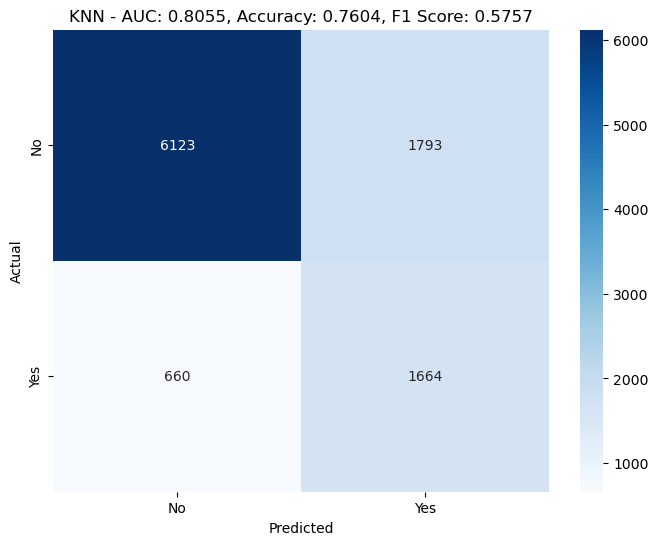

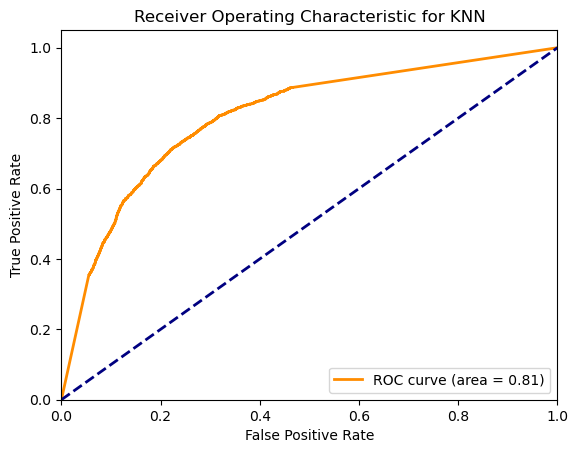

In [79]:

# Step 9: Define and Tune KNN Classifier
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# AUC scoring
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Use RandomizedSearchCV for KNN tuning
grid_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid_knn,
                                     scoring=auc_scorer, n_iter=10, cv=5, n_jobs=-1, random_state=42)
grid_search_knn.fit(X_train_smote, y_train_smote)

best_knn = grid_search_knn.best_estimator_
print(best_knn)

# Evaluate KNN on test set
y_test_pred_knn = best_knn.predict(X_test)
y_test_prob_knn = best_knn.predict_proba(X_test)[:, 1]

auc_knn = roc_auc_score(y_test, y_test_prob_knn)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
f1_knn = f1_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn)
classification_knn = classification_report(y_test, y_test_pred_knn)

print(f"KNN - AUC: {auc_knn}, Accuracy: {accuracy_knn}, F1 Score: {f1_knn}, Recall Score: {recall_knn}, Precision Score: {precision_knn}")
print(classification_knn)

# Confusion Matrix for KNN
confusion_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f"KNN - AUC: {auc_knn:.4f}, Accuracy: {accuracy_knn:.4f}, F1 Score: {f1_knn:.4f}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_knn, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()


# Step 10: Make predictions on unknown data
y_unknown_pred = best_knn.predict(X_unknown_scaled)

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'row ID': [f"Row{num}" for num in unknown_data.index],
    'Predict-RainTomorrow': y_unknown_pred 
})

predictions_df.to_csv('predictions_output.csv', index=False)


### Random Forest Model

RandomForestClassifier(max_depth=10, random_state=42)
RandomForestClassifier - AUC: 0.8648839384101047, Accuracy: 0.81123046875, F1 Score: 0.6294805443741613, Recall Score: 0.7065404475043029, Precision Score: 0.567576909782233
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      7916
           1       0.57      0.71      0.63      2324

    accuracy                           0.81     10240
   macro avg       0.74      0.77      0.75     10240
weighted avg       0.83      0.81      0.82     10240



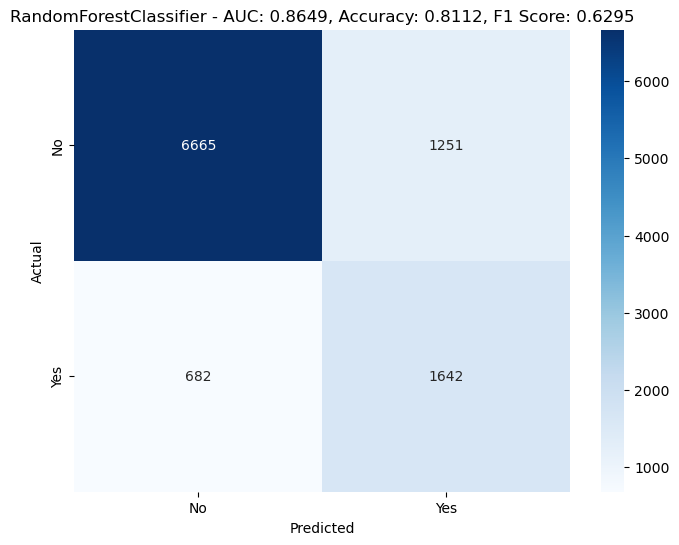

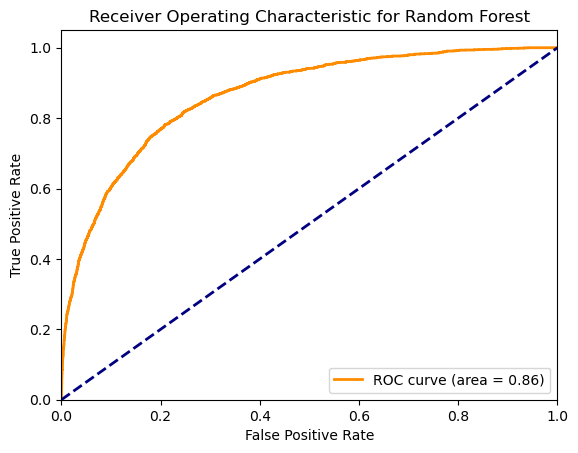

In [82]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [30, 100],  # Adjust number of trees
    'max_depth': [5, 10],  # Depth of each tree
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# AUC scoring
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Use GridSearchCV for efficient tuning
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              scoring=auc_scorer, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)

best_rf = grid_search_rf.best_estimator_
print(best_rf)

# Evaluate on Test Set
y_test_pred_rf = best_rf.predict(X_test)
y_test_prob_rf = best_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_test_prob_rf)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
classification_rf = classification_report(y_test, y_test_pred_rf)

print(f"RandomForestClassifier - AUC: {auc_rf}, Accuracy: {accuracy_rf}, F1 Score: {f1_rf}, Recall Score: {recall_rf}, Precision Score: {precision_rf}")
print(classification_rf)

# Confusion Matrix for RandomForestClassifier
confusion_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f"RandomForestClassifier - AUC: {auc_rf:.4f}, Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_rf, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()


# Step 11: Make predictions on unknown data
y_unknown_pred = best_rf.predict(X_unknown_scaled)

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'row ID': [f"Row{num}" for num in unknown_data.index],
    'Predict-RainTomorrow': y_unknown_pred 
})

predictions_df.to_csv('predictions_output.csv', index=False)

### Neural Network Model

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,), max_iter=500,
              random_state=42)
MLPClassifier - AUC: 0.8594998995476602, Accuracy: 0.801171875, F1 Score: 0.6275155506769118, Recall Score: 0.7379518072289156, Precision Score: 0.545830681094844
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      7916
           1       0.55      0.74      0.63      2324

    accuracy                           0.80     10240
   macro avg       0.73      0.78      0.75     10240
weighted avg       0.83      0.80      0.81     10240



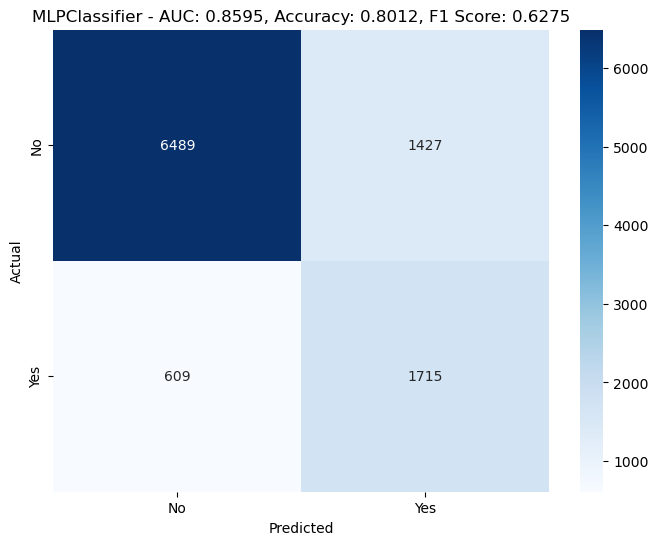

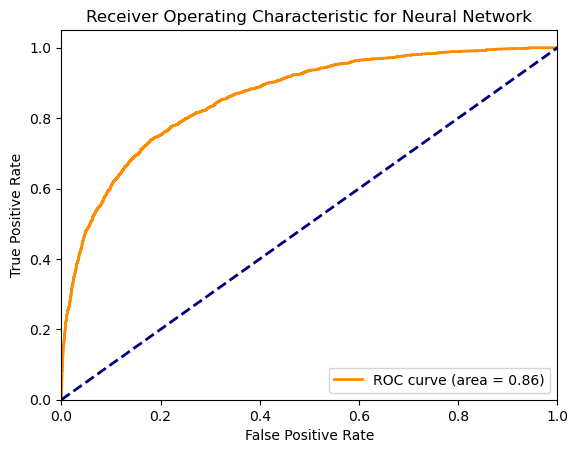

In [85]:
mlp = MLPClassifier(random_state=42, max_iter=500)

param_grid_mlp = {
    'hidden_layer_sizes': [(5, 5), (50, )],  # Reduced layer size for faster training
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],  # Limit alpha to one option for efficiency
}

# AUC scoring
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Use GridSearchCV for efficient tuning
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, 
                               scoring=auc_scorer, cv=3, n_jobs=-1)
grid_search_mlp.fit(X_train_smote, y_train_smote)

best_mlp = grid_search_mlp.best_estimator_
print(best_mlp)

# Evaluate on Test Set
y_test_pred_mlp = best_mlp.predict(X_test)
y_test_prob_mlp = best_mlp.predict_proba(X_test)[:, 1]
auc_mlp = roc_auc_score(y_test, y_test_prob_mlp)
accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
f1_mlp = f1_score(y_test, y_test_pred_mlp)
recall_mlp = recall_score(y_test, y_test_pred_mlp)
precision_mlp = precision_score(y_test, y_test_pred_mlp)
classification_mlp = classification_report(y_test, y_test_pred_mlp)

print(f"MLPClassifier - AUC: {auc_mlp}, Accuracy: {accuracy_mlp}, F1 Score: {f1_mlp}, Recall Score: {recall_mlp}, Precision Score: {precision_mlp}")
print(classification_mlp)

# Confusion Matrix for MLPClassifier
confusion_mlp = confusion_matrix(y_test, y_test_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f"MLPClassifier - AUC: {auc_mlp:.4f}, Accuracy: {accuracy_mlp:.4f}, F1 Score: {f1_mlp:.4f}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_mlp, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()


# Step 11: Make predictions on unknown data
y_unknown_pred = best_mlp.predict(X_unknown_scaled)

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'row ID': [f"Row{num}" for num in unknown_data.index],
    'Predict-RainTomorrow': y_unknown_pred 
})

predictions_df.to_csv('predictions_output.csv', index=False)


### SVM Model

SVC(C=0.1, kernel='linear', probability=True, random_state=42)
SVM - AUC: 0.8559568289213205, Accuracy: 0.773193359375, F1 Score: 0.6071881606765328, Recall Score: 0.7734985187180178, Precision Score: 0.49973899425787366
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     12671
           1       0.50      0.77      0.61      3713

    accuracy                           0.77     16384
   macro avg       0.71      0.77      0.72     16384
weighted avg       0.83      0.77      0.79     16384



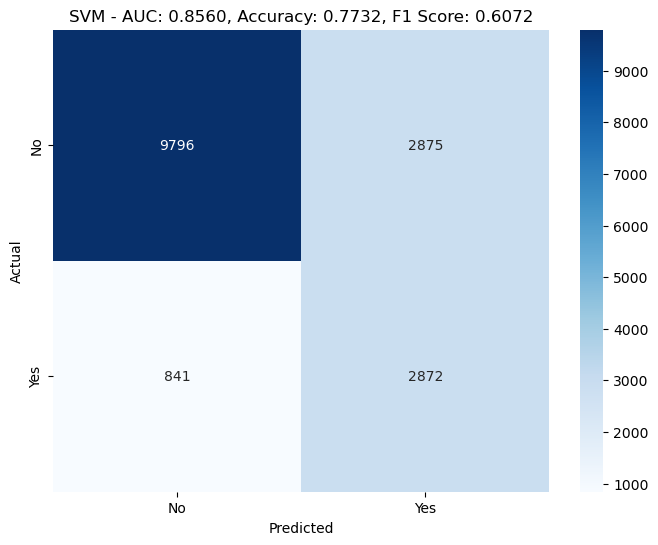

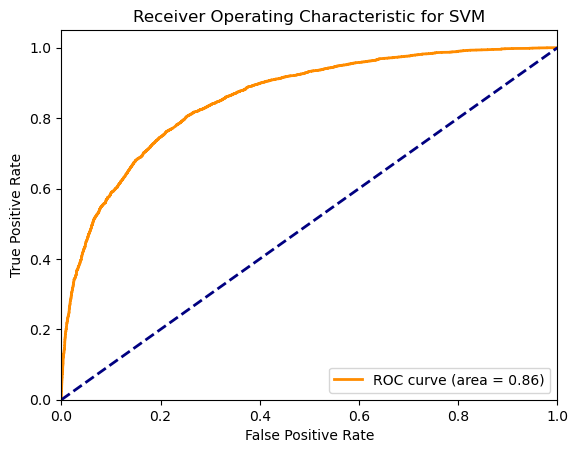

In [87]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
X_train_sub_smote, y_train_sub_smote = smote.fit_resample(X_train_sub, y_train_sub)

svm = SVC(probability=True, random_state=42)

# Smaller parameter grid for faster tuning
param_grid_svm = {
    'C': [0.1],
    'kernel': ['linear'],
    'gamma': ['scale']  # Fixed gamma for simplicity
}

# AUC scoring
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Use RandomizedSearchCV with reduced n_iter for faster tuning
grid_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_grid_svm, 
                                     scoring=auc_scorer, n_iter=1, cv=3, n_jobs=-1, random_state=42)
grid_search_svm.fit(X_train_sub_smote, y_train_sub_smote)

best_svm = grid_search_svm.best_estimator_
print(best_svm)

# Evaluate SVM on test set
y_test_pred_svm = best_svm.predict(X_test_sub)
y_test_prob_svm = best_svm.predict_proba(X_test_sub)[:, 1]

auc_svm = roc_auc_score(y_test_sub, y_test_prob_svm)
accuracy_svm = accuracy_score(y_test_sub, y_test_pred_svm)
f1_svm = f1_score(y_test_sub, y_test_pred_svm)
recall_svm = recall_score(y_test_sub, y_test_pred_svm)
precision_svm = precision_score(y_test_sub, y_test_pred_svm)
classification_svm = classification_report(y_test_sub, y_test_pred_svm)

print(f"SVM - AUC: {auc_svm}, Accuracy: {accuracy_svm}, F1 Score: {f1_svm}, Recall Score: {recall_svm}, Precision Score: {precision_svm}")
print(classification_svm)

# Confusion Matrix for SVM
confusion_svm = confusion_matrix(y_test_sub, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f"SVM - AUC: {auc_svm:.4f}, Accuracy: {accuracy_svm:.4f}, F1 Score: {f1_svm:.4f}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test_sub, y_test_prob_svm, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


# Step 9: Make predictions on unknown data
y_unknown_pred = best_svm.predict(X_unknown_scaled)

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'row ID': [f"Row{num}" for num in unknown_data.index],
    'Predict-RainTomorrow': y_unknown_pred 
})

predictions_df.to_csv('predictions_output.csv', index=False)